In [40]:
import requests
import pandas as pd
import pandas_datareader.data as web
import datetime

api_key = 'REGTU7YTI3S3D5UM'

In [16]:
url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol={}&apikey={}'.format('MSFT', api_key)
r = requests.get(url)
data = r.json()

quarterly_earnings = data['quarterlyEarnings']
print(quarterly_earnings)


[{'fiscalDateEnding': '2022-12-31', 'reportedDate': '2023-01-24', 'reportedEPS': '2.32', 'estimatedEPS': '2.3', 'surprise': '0.02', 'surprisePercentage': '0.8696'}, {'fiscalDateEnding': '2022-09-30', 'reportedDate': '2022-10-25', 'reportedEPS': '2.35', 'estimatedEPS': '2.3', 'surprise': '0.05', 'surprisePercentage': '2.1739'}, {'fiscalDateEnding': '2022-06-30', 'reportedDate': '2022-07-26', 'reportedEPS': '2.23', 'estimatedEPS': '2.29', 'surprise': '-0.06', 'surprisePercentage': '-2.6201'}, {'fiscalDateEnding': '2022-03-31', 'reportedDate': '2022-04-26', 'reportedEPS': '2.22', 'estimatedEPS': '2.19', 'surprise': '0.03', 'surprisePercentage': '1.3699'}, {'fiscalDateEnding': '2021-12-31', 'reportedDate': '2022-01-25', 'reportedEPS': '2.48', 'estimatedEPS': '2.31', 'surprise': '0.17', 'surprisePercentage': '7.3593'}, {'fiscalDateEnding': '2021-09-30', 'reportedDate': '2021-10-26', 'reportedEPS': '2.27', 'estimatedEPS': '2.08', 'surprise': '0.19', 'surprisePercentage': '9.1346'}, {'fiscalD

In [69]:
dates = []
eps = []
for item in quarterly_earnings:
    dates.append(item['fiscalDateEnding'])
    eps.append(item['reportedEPS'])
    # print(item['fiscalDateEnding'], item['reportedEPS'])

end_date = dates[0]
start_date = dates[-1]

print(start_date, end_date)


1996-03-31 2022-12-31


In [64]:
qe_df = pd.DataFrame(list(zip(dates, eps)), columns=['Date', 'EPS'])
qe_df.head()

,Date,EPS
0,2022-12-31,2.32
1,2022-09-30,2.35
2,2022-06-30,2.23
3,2022-03-31,2.22
4,2021-12-31,2.48


In [65]:
qe_df.tail()

,Date,EPS
103,1997-03-31,0.1
104,1996-12-31,0.07
105,1996-09-30,0.06
106,1996-06-30,0.05
107,1996-03-31,0.06


In [95]:
qe_df_2 = pd.DataFrame(eps, index=dates, columns=['EPS'])
qe_df_2.head()


,EPS
2022-12-31,2.32
2022-09-30,2.35
2022-06-30,2.23
2022-03-31,2.22
2021-12-31,2.48


In [85]:
import datetime
import pandas_datareader.data as pdr

msft = pdr.DataReader("MSFT", "av-monthly", start=start_date, end=end_date, api_key='REGTU7YTI3S3D5UM')
# print(list(msft.index))
# print(msft.loc['2022-12-30']['close'])

In [104]:
share_prices_final = []
PE_ratios = []
dates_final = []

stock_price_dates = list(msft.index)
for date in dates:
    for stock_price_date in stock_price_dates:
        if date[:7] == stock_price_date[:7]:
            PE_ratio = float(msft.loc[stock_price_date]['close']) / float(qe_df_2.loc[date]['EPS'])
            PE_ratios.append(PE_ratio)
            dates_final.append(date)
            share_prices_final.append(msft.loc[stock_price_date]['close'])

            # print(stock_price_date[:7], msft.loc[stock_price_date]['close'], PE_ratio)

In [107]:
df_final = pd.DataFrame(list(zip(share_prices_final, PE_ratios)), index=dates_final, columns=['Share Price', 'PE Ratio'])
df_final.head()

,Share Price,PE Ratio
2022-12-31,239.82,103.370690
2022-09-30,232.90,99.106383
2022-06-30,256.83,115.170404
2022-03-31,308.31,138.878378
2021-12-31,336.32,135.612903


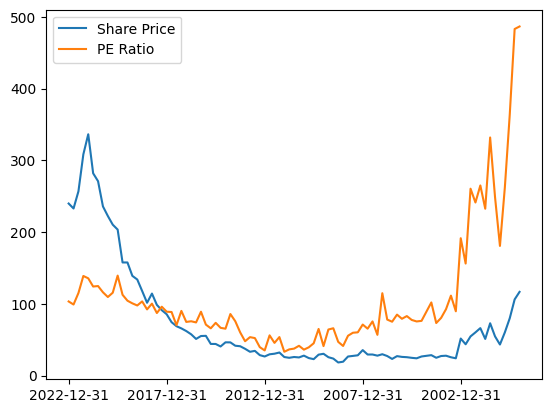

In [108]:
import matplotlib.pyplot as plt
# plot a line graph of the PE ratio and the share price
df_final.plot()
plt.show()
